In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Quora.csv")

In [3]:
data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


<AxesSubplot:title={'center':'answer'}>

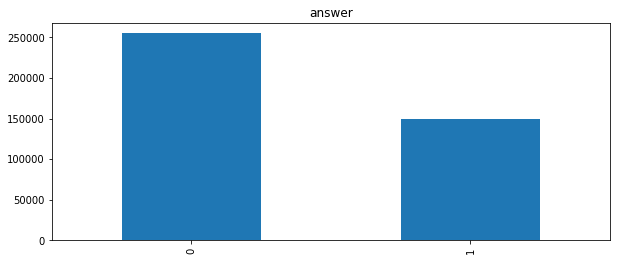

In [5]:
data["is_duplicate"].value_counts().plot(kind="bar",title="answer",figsize=(10,4))

In [6]:
id1=data["qid1"]
id2=data["qid2"]
distinct=set()
count=0
while count<len(id1):
    distinct.add(id1[count])
    distinct.add(id2[count])
    count+=1
    
print("Total Unique Questions", len(distinct))
    

Total Unique Questions 537933


In [7]:
#checking Null values
data[data.columns[data.isnull().any()]].isnull().sum()

question1    1
question2    2
dtype: int64

In [8]:
#replacing the NAN with empty string
data=data.fillna(" ")

In [9]:
data[data.columns[data.isnull().any()]].isnull().sum()

Series([], dtype: float64)

# Feature Extraction

In [10]:
#Adding frequency of Qid's
data["freq_qid1"]=data.groupby("qid1")["qid1"].transform('count')
data["freq_qid2"]=data.groupby("qid2")["qid2"].transform('count')


In [11]:
#len of quid1 and qid2
len_Q1=[]
for sentence in data["question1"]:
    k=len(sentence.split())
    len_Q1.append(k)

len_Q2=[]
for sentence in data["question2"]:
    k=len(sentence.split())
    len_Q2.append(k)

data["len_Q1"]=len_Q1
data["len_Q2"]=len_Q2

In [12]:
data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,len_Q1,len_Q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,8,13


In [13]:
#Word common question 1 and question 2

word_common=[]
x=0
question1=data["question1"]
question2=data["question2"]
for x in range(len(data["question1"])):
    q1=question1[x].split()
    count=0
    for i in q1:
        if i in (question2[x].split()):
            count+=1
    word_common.append(count)
    

In [14]:
#print(word_common)
print(question1[0])
print(question2[0])

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?


In [15]:
data["w_common"]=word_common

In [16]:
data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,len_Q1,len_Q2,w_common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,14,12,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,8,13,4


In [17]:
#Word total=totalword in question1 and total word in question2
word_total=[]
i=0
for i in range(len(question1)):
    k=len(question1[i].split())
    l=len(question2[i].split())
    total=k+l
    word_total.append(total)

In [18]:
data["word_total"]=word_total

In [19]:
#word share 
#word share=wordcommon/wordtotal
import numpy as np
w_common=data["w_common"]
word_total=data["word_total"]
w_share=[]
i=0
for i in range(len(w_common)):
    share=w_common[i]/word_total[i]
    share=np.round(share,3)
    w_share.append(share)

In [20]:
print(w_share[0])

0.462


In [21]:
data["w_share"]=w_share

In [22]:
data.head(4)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,len_Q1,len_Q2,w_common,word_total,w_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,14,12,12,26,0.462
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,8,13,4,21,0.190
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,14,10,3,24,0.125
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,11,9,0,20,0.000


In [23]:
#freq_qid1+freq_qid2
data["total_freq"]=data["freq_qid1"]+data["freq_qid2"]



In [24]:
data.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,len_Q1,len_Q2,w_common,word_total,w_share,total_freq
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,14,12,12,26,0.462,2


In [25]:
#diff of frequency
data["dif_freq"]=abs(data["freq_qid1"]-data["freq_qid2"])

In [26]:
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,len_Q1,len_Q2,w_common,word_total,w_share,total_freq,dif_freq
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,14,12,12,26,0.462,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,8,13,4,21,0.190,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,14,10,3,24,0.125,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,11,9,0,20,0.000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,13,7,2,20,0.100,4,2


# Working on text Data

In [ ]:
"""Removing html tags
Removing Punctuations
Performing stemming
Removing Stopwords
Expanding contractions etc
"""

In [27]:
#remove html tag
import re
html_one=[]
for i in data["question1"]:
    k=re.sub('<.*?>'," ",i)
    html_one.append(k)


In [28]:
html_two=[]
for i in data["question2"]:
    k=re.sub("<.*?>"," ",i)
    html_two.append(k)

In [29]:
#remove puntuation 
pun_one=[]
for i in html_one:
    z=re.sub("[?|!|\'|'|#]"," ",i)
    pun_one.append(z)

In [30]:
pun_two=[]
for i in html_two:
    z=re.sub("[?|!|\'|'|#]"," ",i)
    pun_two.append(z)

In [32]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
porter=PorterStemmer()

In [33]:
stop=set(stopwords.words('english'))
remove_one=[]
stop_one=[]
for i in pun_one:
    sentence=" "
    stop=" "
    for word in i.split():
        if word not in stop:
            word=word.lower()
            word=porter.stem(word)
            sentence=sentence+" "+word
        else:
            stop=stop+" "+word
            
    remove_one.append(sentence)
    stop_one.append(stop)

In [34]:
remove_two=[]
stop_two=[]
for i in pun_two:
    sentence=" "
    stop=" "
    for word in i.split():
        if word not in stop:
            word=word.lower()
            word=porter.stem(word)
            sentence=sentence+" "+word
        else:
            stop=stop+" "+word
            
    remove_two.append(sentence)
    stop_two.append(stop)

#Features:

cwc_min : Ratio of common_word_count to min lenghth of word count of Q1 and Q2
cwc_min = common_word_count / (min(len(q1_words), len(q2_words))



cwc_max : Ratio of common_word_count to max lenghth of word count of Q1 and Q2
cwc_max = common_word_count / (max(len(q1_words), len(q2_words))



csc_min : Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2
csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))



csc_max : Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2
csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))



ctc_min : Ratio of common_token_count to min lenghth of token count of Q1 and Q2
ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))



ctc_max : Ratio of common_token_count to max lenghth of token count of Q1 and Q2
ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))



last_word_eq : Check if First word of both questions is equal or not
last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])



first_word_eq : Check if First word of both questions is equal or not
first_word_eq = int(q1_tokens[0] == q2_tokens[0])



abs_len_diff : Abs. length difference
abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))



mean_len : Average Token Length of both Questions
mean_len = (len(q1_tokens) + len(q2_tokens))/2



In [35]:
#common word
from tqdm import tqdm
SAFE_DIV = 0.0001 
STOP_WORDS=set(stopwords.words('english'))
all_cwcmin=[]
all_cwcmax=[]
all_cscmin=[]
all_cscmax=[]
all_ctcmin=[]
all_ctcmax=[]
all_last=[]
all_dif=[]
all_mean=[]
all_first=[]
i=0
ques1=data["question1"]
ques2=data["question2"]
for i in tqdm(range(len(data['question1']))):
    word1=ques1[i].split()
    word2=ques2[i].split()
    if len(word1)==0 or len(word2)==0:
        all_cwcmin.append(0)
        all_cwcmax.append(0)
        all_cscmin.append(0)
        all_cscmax.append(0)
        all_ctcmin.append(0)
        all_ctcmax.append(0)
        all_last.append(0)
        all_first.append(0)
        all_dif.append(0)
        all_mean.append(0)
    else:
        
        q1_words = set([word for word in word1 if word not in STOP_WORDS])
        q2_words = set([word for word in word2 if word not in STOP_WORDS])
    
        q1_stops = set([word for word in word1 if word in STOP_WORDS])
        q2_stops = set([word for word in word2 if word in STOP_WORDS])
    
        common_word_count = len(q1_words.intersection(q2_words))
        common_stop_count = len(q1_stops.intersection(q2_stops))
    
        common_token_count = len(set(word1).intersection(set(word2)))
    
        cwc_min=common_word_count/(min(len(q1_words),len(q2_words))+SAFE_DIV)
        cwc_max=common_word_count/(max(len(q1_words),len(q2_words))+SAFE_DIV)
    
        csc_min=common_stop_count/(min(len(q1_stops),len(q2_stops))+SAFE_DIV)
        csc_max=common_stop_count/(max(len(q1_stops),len(q2_stops))+SAFE_DIV)
    
        ctc_min=common_token_count/(min(len(word1),len(word2))+SAFE_DIV)
        ctc_max=common_token_count/(min(len(word1),len(word2))+SAFE_DIV)
    
        last_word1=word1[-1]
        last_word2=word2[-1]
        last=0
        if last_word1==last_word2:
            last=1
    
        first_word1=word1[0]
        first_word2=word2[0]
        first=0
        if first_word1==first_word2:
            first=1
        len_dif=abs(len(word1)-len(word2))
        mean=(len(word1)+len(word2))/2
        all_cwcmin.append(cwc_min)
        all_cwcmax.append(cwc_max)
        all_cscmin.append(csc_min)
        all_cscmax.append(csc_max)
        all_ctcmin.append(ctc_min)
        all_ctcmax.append(ctc_max)
        all_last.append(last)
        all_first.append(first)
        all_dif.append(len_dif)
        all_mean.append(mean)
    



100%|███████████████████████████████████████████████████████████████████████| 404290/404290 [00:16<00:00, 24909.44it/s]


In [95]:
w=[1,2,3,4]
w[-1]

4

In [36]:
data["cwcmin"]=all_cwcmin
data["cwcmax"]=all_cwcmax
data["cscmin"]=all_cscmin
data["cscmax"]=all_cscmax
data["ctcmin"]=all_ctcmin
data["ctcmax"]=all_ctcmax
data["last"]=all_last
data["first"]=all_first
data["diff"]=all_dif
data["mean"]=all_mean

In [37]:
data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,len_Q1,len_Q2,...,cwcmin,cwcmax,cscmin,cscmax,ctcmin,ctcmax,last,first,diff,mean
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,14,12,...,0.833319,0.714276,0.999980,0.999980,0.833326,0.833326,0,1,2,13.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,8,13,...,0.599988,0.299997,0.499975,0.333322,0.499994,0.499994,0,1,5,10.5


In [38]:
from fuzzywuzzy import fuzz


C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [39]:
data["token_set_ratio"]       = data.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
data["token_sort_ratio"]      = data.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
data["fuzz_ratio"]            = data.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
data["fuzz_partial_ratio"]    = data.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)


NameError: name 'get_longest_substr_ratio' is not defined

In [40]:
print(data.columns)

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'len_Q1', 'len_Q2', 'w_common', 'word_total',
       'w_share', 'total_freq', 'dif_freq', 'cwcmin', 'cwcmax', 'cscmin',
       'cscmax', 'ctcmin', 'ctcmax', 'last', 'first', 'diff', 'mean',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio'],
      dtype='object')


In [43]:
import distance

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

In [44]:
data["longest_substr_ratio"]  = data.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,len_Q1,len_Q2,...,ctcmax,last,first,diff,mean,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,14,12,...,0.833326,0,1,2,13.0,100,93,93,98,0.965517
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,8,13,...,0.499994,0,1,5,10.5,86,63,66,73,0.442308
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,14,10,...,0.299997,0,1,4,12.0,63,63,43,41,0.150000
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,11,9,...,0.000000,0,0,2,10.0,28,24,9,20,0.039216


In [46]:
new_data=data.to_csv(index=True)

In [49]:
data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,len_Q1,len_Q2,...,ctcmax,last,first,diff,mean,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,14,12,...,0.833326,0,1,2,13.0,100,93,93,98,0.965517
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,8,13,...,0.499994,0,1,5,10.5,86,63,66,73,0.442308


In [50]:
print(data.columns)

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'len_Q1', 'len_Q2', 'w_common', 'word_total',
       'w_share', 'total_freq', 'dif_freq', 'cwcmin', 'cwcmax', 'cscmin',
       'cscmax', 'ctcmin', 'ctcmax', 'last', 'first', 'diff', 'mean',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')


(404290, 30)


In [61]:
data.to_csv("Feature.csv",index=False)